## Load Data

In [84]:
# %%timeit
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
from datetime import datetime
from time import time
from os import getcwd
from os.path import join

path = join(getcwd().rstrip('src'), 'data/owid-covid-data.csv').replace('\\', '/')
ex_path1 = join(getcwd().rstrip('src'), 'pic/BD_w7_hw/q1/BD_w7_hw_').replace('\\', '/')
ex_path2 = join(getcwd().rstrip('src'), 'pic/BD_w7_hw/q2_date/BD_w7_hw_dr_').replace('\\', '/')
ex_path3 = join(getcwd().rstrip('src'), 'pic/BD_w7_hw/q2_day/BD_w7_hw_dr_').replace('\\', '/')
data = pd.read_csv(path)

# 1. Make a graph like this for Taiwan and World before the end of July, 2021.

## Get Location Data

In [85]:
# Set location
locs = list(set(data.location)) # some elements are not locations
# print(locs)
loc1 = 'Taiwan'
loc2 = 'World'

In [86]:
# Get location data
l1d = data.loc[data['location']==loc1]
l2d = data.loc[data['location']==loc2]
print(len(l1d))
print(len(l2d))
# l1d.head(5)
# l2d.head(5)

983
977


In [87]:
# needed columns date, total_cases, total_deaths
col_all = list(data.columns)

# used column
col_all.remove('date')
col_all.remove('total_cases')
col_all.remove('total_deaths')
# unusable column
col_all.remove('iso_code')
col_all.remove('continent')
col_all.remove('location')
col_all.remove('weekly_icu_admissions_per_million')
col_all.remove('weekly_icu_admissions')
col_all.remove('weekly_hosp_admissions_per_million')
col_all.remove('weekly_hosp_admissions')
col_all.remove('icu_patients_per_million')
col_all.remove('icu_patients')
col_all.remove('hosp_patients_per_million')
col_all.remove('hosp_patients')
# single value column
col_all.remove('aged_65_older')
col_all.remove('aged_70_older')
col_all.remove('cardiovasc_death_rate')
col_all.remove('diabetes_prevalence')
col_all.remove('extreme_poverty')
col_all.remove('female_smokers')
col_all.remove('gdp_per_capita')
col_all.remove('handwashing_facilities')
col_all.remove('hospital_beds_per_thousand')
col_all.remove('human_development_index')
col_all.remove('life_expectancy')
col_all.remove('male_smokers')
col_all.remove('median_age')
col_all.remove('population')
col_all.remove('population_density')

for x in col_all:
    del l1d[x]
    del l2d[x]
# l1d.head(30)
# l2d.head(30)

In [88]:
l1d.insert(1, '%death', l1d.total_deaths / l1d.total_cases)
l2d.insert(1, '%death', l2d.total_deaths / l2d.total_cases)
print(l1d.shape)
print(l2d.shape)

(983, 30)
(977, 30)


In [89]:
start = '2019-12-31'
l1d = l1d[(l1d.date >= start)]
l2d = l2d[(l2d.date >= start)]
l1d.date = pd.to_datetime(l1d['date'], format='%Y-%m-%d')
l2d.date = pd.to_datetime(l2d['date'], format='%Y-%m-%d')

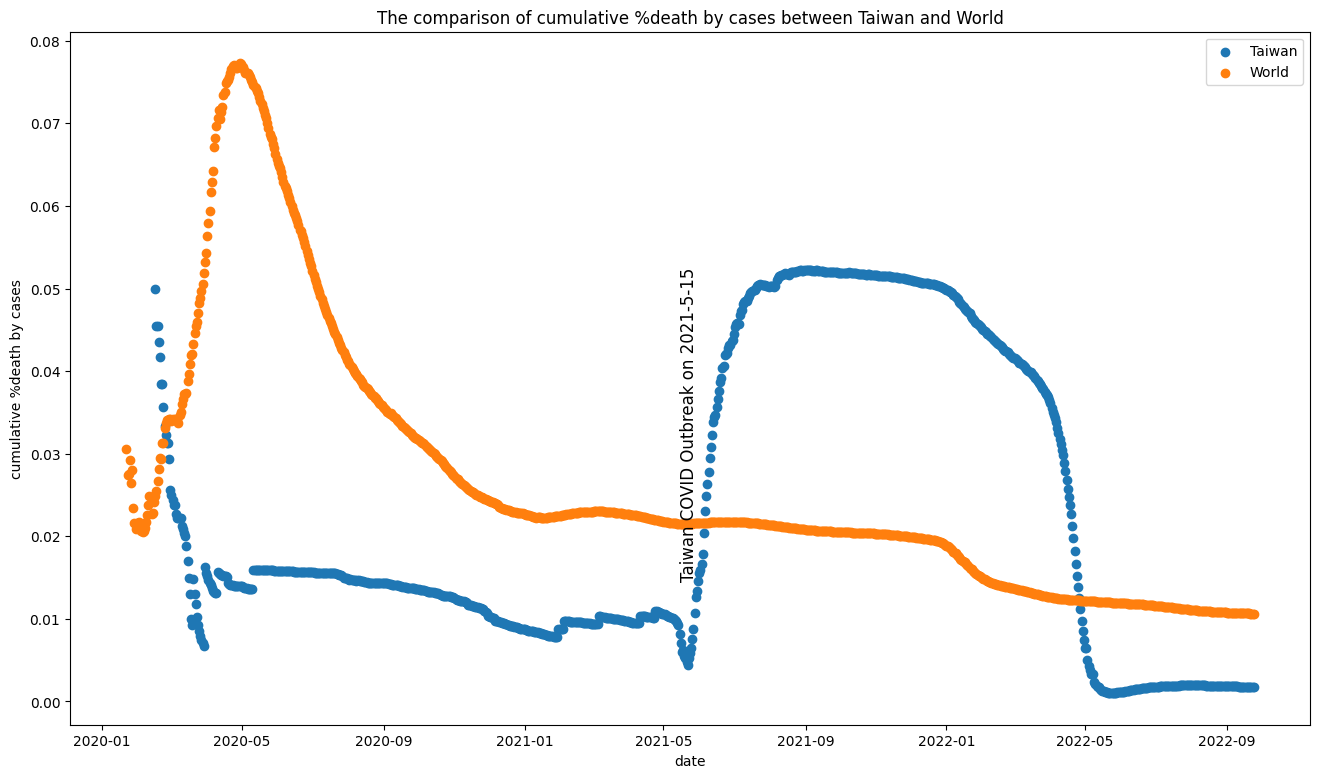

In [90]:
%matplotlib inline
plt.figure(figsize=(16,9))
plt.title('The comparison of cumulative %death by cases between {0} and {1}'.format(loc1, loc2))
plt.xlabel('date')
plt.ylabel('cumulative %death by cases')
plt.scatter(l1d.date, l1d['%death'])
plt.scatter(l2d.date, l2d['%death'])
plt.legend(['Taiwan', 'World'])
plt.text(Timestamp("2021-5-15"), 0.015, 'Taiwan COVID Outbreak on 2021-5-15', fontsize=12, rotation='vertical')
plt.savefig(ex_path1 + 'date.jpg', dpi=300)

In [91]:
l1d.insert(1, 'dstart', start)
l2d.insert(1, 'dstart', start)
l1d.dstart = pd.to_datetime(l1d['dstart'], format='%Y-%m-%d')
l2d.dstart = pd.to_datetime(l2d['dstart'], format='%Y-%m-%d')
l1d.insert(2, 'ddiff', (l1d['date'] - l1d['dstart'])/np.timedelta64(1, 'D'))
l2d.insert(2, 'ddiff', (l2d['date'] - l2d['dstart'])/np.timedelta64(1, 'D'))
# l1d.head(30)
# l2d.head(30)
# print(l1d.shape)
# print(l2d.shape)

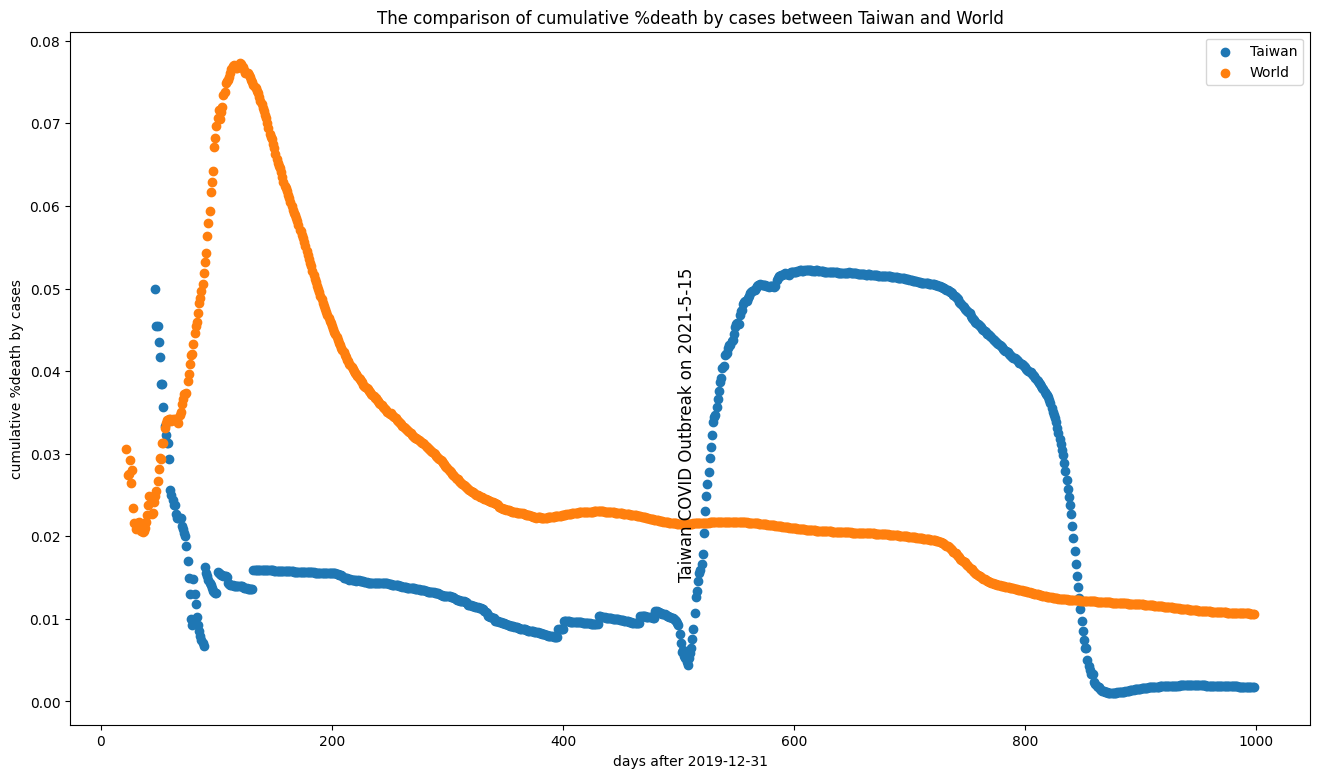

In [92]:
%matplotlib inline
plt.figure(figsize=(16,9))
plt.title('The comparison of cumulative %death by cases between {0} and {1}'.format(loc1, loc2))
plt.xlabel('days after 2019-12-31')
plt.ylabel('cumulative %death by cases')
plt.scatter(l1d.ddiff, l1d['%death'])
plt.scatter(l2d.ddiff, l2d['%death'])
plt.legend(['Taiwan', 'World'])
plt.text(500, 0.015, 'Taiwan COVID Outbreak on 2021-5-15', fontsize=12, rotation='vertical')
plt.savefig(ex_path1 + 'day.jpg', dpi=300)

# 2. Explain why Taiwan has higher %death by cases than world average in July 2021.

In [93]:
# create function to export img
def display_relationship(parameter=['date'], show_row=10, print_result=False):
    # get "taiwan", "world", data
    l1d = data.loc[data['location']==loc1]
    l2d = data.loc[data['location']==loc2]
    # drop columns
    col_all = list(data.columns)
    col_all.remove('date')
    col_all.remove('total_cases')
    col_all.remove('total_deaths')
    for x in parameter:
        col_all.remove(x)
    for x in col_all:
        del l1d[x]
        del l2d[x]
    # convert "date" column dtype + confine data range
    l1d.insert(1, '%death', l1d.total_deaths / l1d.total_cases)
    l2d.insert(1, '%death', l2d.total_deaths / l2d.total_cases)
    start = '2019-12-31'
    l1d = l1d[(l1d.date >= start)]
    l2d = l2d[(l2d.date >= start)]
    l1d.date = pd.to_datetime(l1d['date'], format='%Y-%m-%d')
    l2d.date = pd.to_datetime(l2d['date'], format='%Y-%m-%d')
    print(l1d.head(show_row)) if print_result else None
    print(l2d.head(show_row)) if print_result else None
    # plot data comparison with axis as date
    %matplotlib inline
    fig, axs = plt.subplots(len(parameter)+1, 1, figsize=(20,10*len(parameter)))
    fig.tight_layout(pad=5, h_pad=3, w_pad=3)
    fig.suptitle('The comparison of cumulative %death by cases between {0} and {1}'.format(loc1, loc2))
    axs[0].set_xlabel('date')
    axs[0].set_ylabel('cumulative %death by cases')
    axs[0].scatter(l1d.date, l1d['%death'], label=loc1)
    axs[0].scatter(l2d.date, l2d['%death'], label=loc2)
    axs[0].legend()
    axs[0].text(Timestamp("2021-5-15"), 0.01, 'Taiwan COVID Outbreak on 2021-5-15', fontsize=12, rotation='vertical')
    for x in range(len(parameter)):
        axs[x+1].set_xlabel('date')
        axs[x+1].set_ylabel(parameter[x])
        axs[x+1].scatter(l1d.date, l1d[parameter[x]], label=loc1 + '_' + parameter[x])
        axs[x+1].scatter(l2d.date, l2d[parameter[x]], label=loc2 + '_' + parameter[x])
        axs[x+1].legend()
        axs[x+1].axvline(Timestamp("2021-5-15"))
    plt.savefig(ex_path2 + '{0}_date.jpg'.format(parameter[x]), dpi=300)
    # add column to convert date string to day count
    l1d.insert(1, 'dstart', start)
    l2d.insert(1, 'dstart', start)
    l1d.dstart = pd.to_datetime(l1d['dstart'], format='%Y-%m-%d')
    l2d.dstart = pd.to_datetime(l2d['dstart'], format='%Y-%m-%d')
    l1d.insert(2, 'ddiff', (l1d['date'] - l1d['dstart'])/np.timedelta64(1, 'D'))
    l2d.insert(2, 'ddiff', (l2d['date'] - l2d['dstart'])/np.timedelta64(1, 'D'))
    # plot data comparison with axis as day
    %matplotlib inline
    fig, axs = plt.subplots(len(parameter)+1, 1, figsize=(20,10*len(parameter)))
    fig.tight_layout(pad=5, h_pad=3, w_pad=3)
    fig.suptitle('The comparison of cumulative %death by cases between {0} and {1}'.format(loc1, loc2))
    axs[0].set_xlabel('days after 2019-12-31')
    axs[0].set_ylabel('cumulative %death by cases')
    axs[0].scatter(l1d.ddiff, l1d['%death'])
    axs[0].scatter(l2d.ddiff, l2d['%death'])
    axs[0].legend(['Taiwan', 'World'])
    axs[0].text(500, 0.01, 'Taiwan COVID Outbreak on 2021-5-15', fontsize=12, rotation='vertical')
    for x in range(len(parameter)):
        axs[x+1].set_xlabel('date')
        axs[x+1].set_ylabel(parameter[x])
        axs[x+1].scatter(l1d.ddiff, l1d[parameter[x]], label=loc1 + '_' + parameter[x])
        axs[x+1].scatter(l2d.ddiff, l2d[parameter[x]], label=loc2 + '_' + parameter[x])
        axs[x+1].legend()
        axs[x+1].axvline(500)
    plt.savefig(ex_path3 + '{0}_days.jpg'.format(parameter[x]), dpi=300)

20/38 52.63% param: tests_units									er_thousand						
ERROR: 'value' must be an instance of str or bytes, not a float


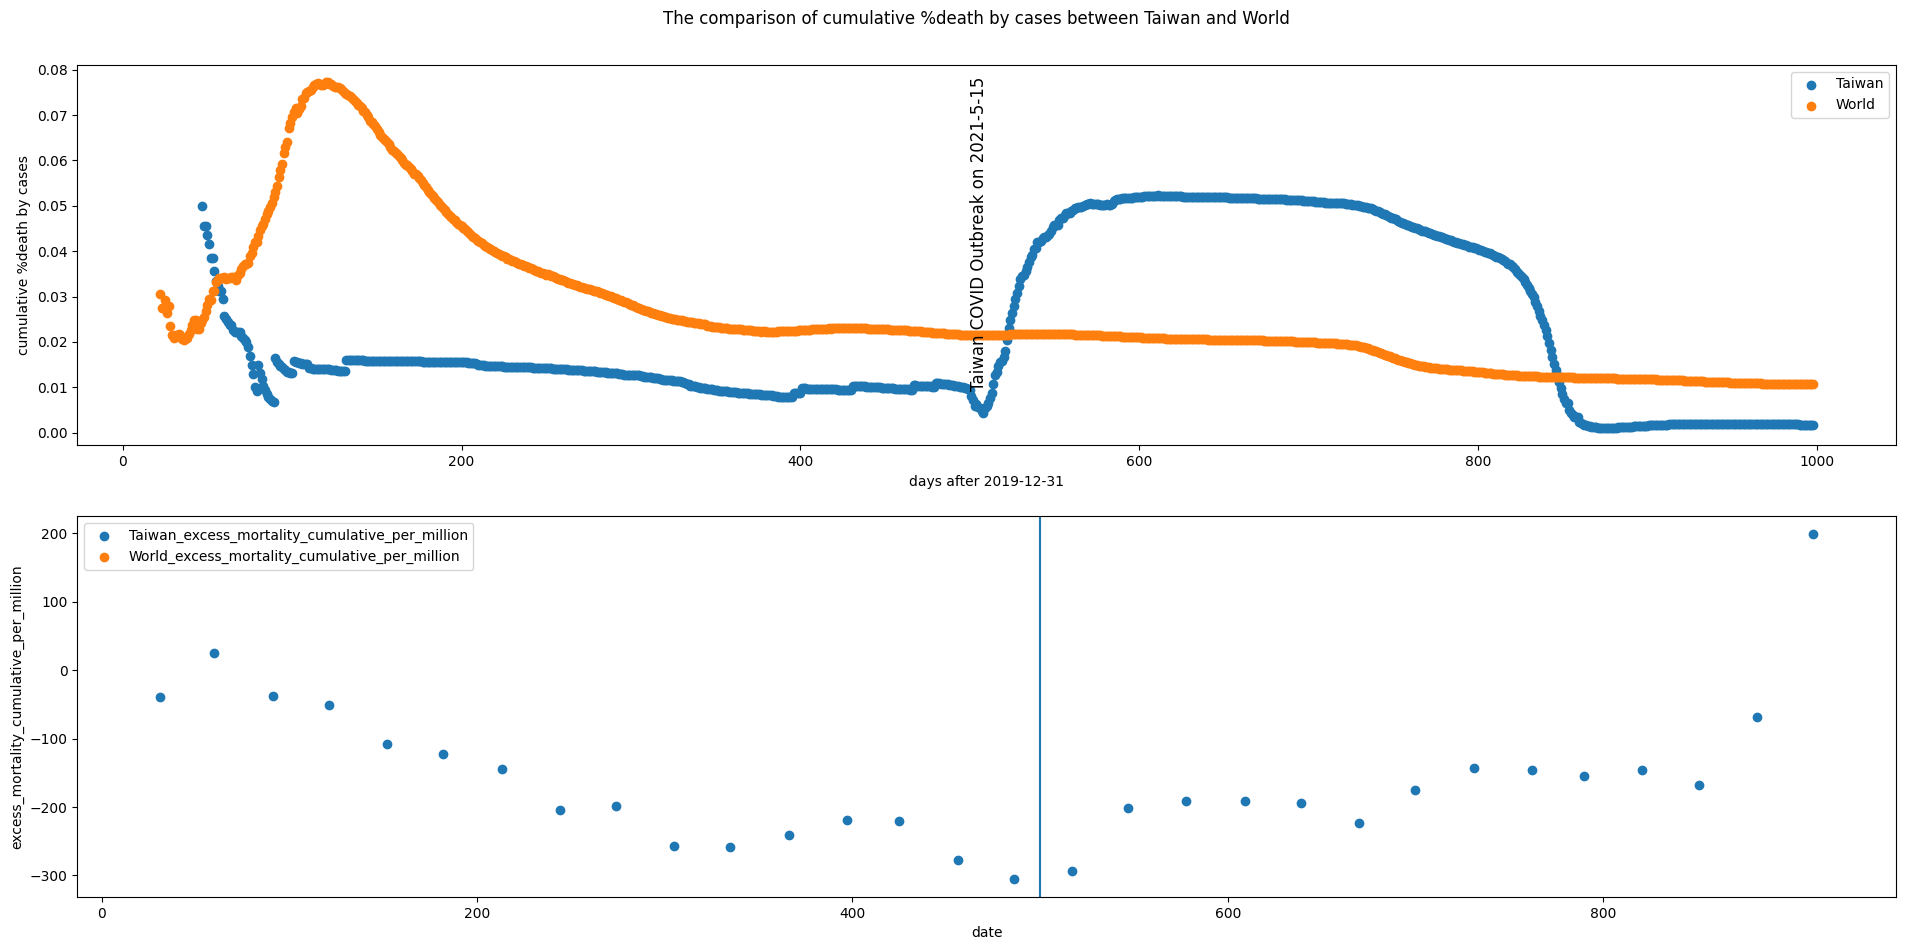

In [94]:
# sus_col = ['icu_patients', 'hosp_patients', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']
length = len(col_all)
for i in range(length):
    print('{0}/{1} {2:.2f}% param: {3}\t\t\t\t\t\t'.format(i+1, length, (i+1)/length*100, col_all[i]), end='\r')
    try:
        display_relationship([col_all[i]])
    except Exception as e:
        print('{0}/{1} {2:.2f}% param: {3}\nERROR: {4}'.format(i+1, length, (i+1)/length*100, col_all[i], e))

Suspected data related to this issue.
1. new_tests
2. new_tests_per_thousand
3. new_tests_smoothed
4. new_tests_smoothed_per_thousand
5. people_fully_vaccinated
6. people_fully_vaccinated_per_hundred
7. stringency_index
8. total_tests
9. total_tests_per_thousand

# 3. Explain why there is %death drop right before the outbreak.

Suspected data related to this issue.
1. new_deaths_per_million
2. new_deaths_smoothed_per_million
3. new_people_vaccinated_smoothed_per_hundred
4. new_vaccinations_smoothed_per_million (low)
5. positive_rate (low)
6. reproduction_rate